# Simplifying Data With The Douglas-Peucker Algorithm

In [1]:
import os
import tarfile
import glob

import plio
import libpysat
import math
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

import pandas as pd

from datasketch import MinHashLSH, WeightedMinHashGenerator, MinHash

In [2]:
files = glob.glob('*.sl2')
for f in files:
    tar = tarfile.open(f)
    # Extract the spc and the ctg files
    list(map(tar.extract, [m for m in tar.getmembers() if '.spc' in m.name]))

In [3]:
"# To get a dataframe of the data\n",
import os
files = glob.glob('*.spc')
d = {}
for f in files:
    s = libpysat.data.spectra.Spectra.from_file(f)
    ref1s = s.xs('REF1', level=1, axis=1)
    d[f] = ref1s.data


/home/cole/miniconda3/envs/pokemon/lib/python3.6/site-packages/libpysat-0.1.0-py3.6.egg/libpysat/data/io.py:21: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  geo_data = io_spectral_profiler.Spectral_Profiler(f)


In [4]:
print( len (files))
print( len(d) )
d['SP_2C_02_05890_N641_E1602.spc']

30
30


id,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
major,,,,,,,,,,,,,,,,,,,,,
512.6,0.0547,0.0482,0.0560,0.0303,0.0144,0.0036,0.0043,0.0032,0.0114,0.0480,...,0.0367,0.0638,0.1054,0.1025,0.0937,0.0678,0.0489,0.0453,0.0364,0.0296
518.4,0.0655,0.0585,0.0681,0.0365,0.0171,0.0041,0.0049,0.0043,0.0137,0.0579,...,0.0444,0.0775,0.1272,0.1244,0.1140,0.0822,0.0594,0.0544,0.0445,0.0360
524.7,0.0670,0.0597,0.0694,0.0372,0.0175,0.0044,0.0051,0.0044,0.0142,0.0591,...,0.0452,0.0791,0.1297,0.1267,0.1161,0.0838,0.0608,0.0556,0.0452,0.0366
530.4,0.0700,0.0625,0.0725,0.0390,0.0183,0.0044,0.0055,0.0042,0.0147,0.0619,...,0.0472,0.0826,0.1358,0.1324,0.1214,0.0877,0.0634,0.0582,0.0473,0.0383
536.5,0.0718,0.0641,0.0744,0.0399,0.0191,0.0047,0.0058,0.0048,0.0151,0.0632,...,0.0483,0.0850,0.1392,0.1365,0.1252,0.0906,0.0655,0.0598,0.0485,0.0393
542.8,0.0739,0.0663,0.0770,0.0412,0.0196,0.0049,0.0059,0.0050,0.0159,0.0653,...,0.0501,0.0880,0.1434,0.1407,0.1291,0.0933,0.0674,0.0616,0.0500,0.0405
548.7,0.0752,0.0672,0.0778,0.0419,0.0200,0.0050,0.0058,0.0051,0.0160,0.0663,...,0.0509,0.0893,0.1457,0.1429,0.1307,0.0947,0.0685,0.0623,0.0507,0.0410
554.5,0.0767,0.0683,0.0788,0.0426,0.0202,0.0052,0.0059,0.0052,0.0162,0.0678,...,0.0518,0.0909,0.1485,0.1453,0.1333,0.0964,0.0696,0.0634,0.0515,0.0416
560.5,0.0797,0.0712,0.0822,0.0443,0.0210,0.0053,0.0062,0.0054,0.0170,0.0705,...,0.0539,0.0948,0.1545,0.1515,0.1389,0.1006,0.0725,0.0661,0.0535,0.0434


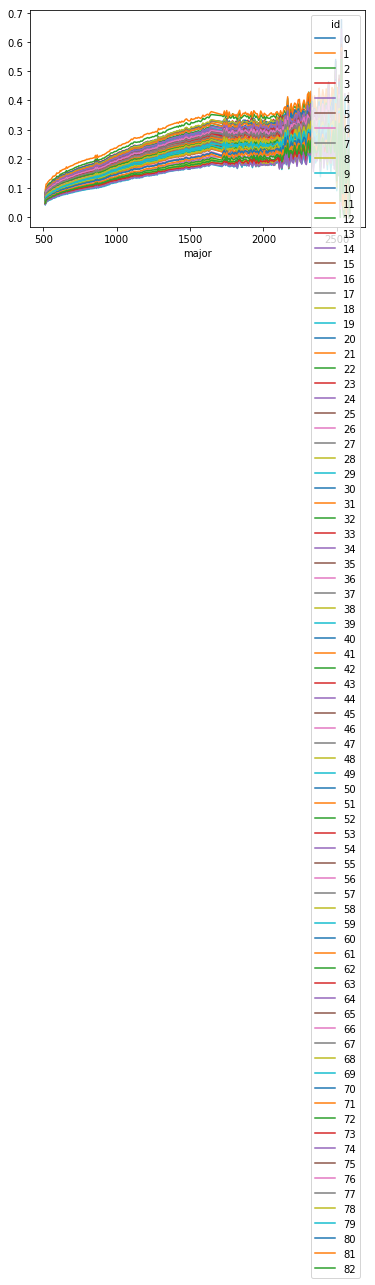

In [5]:
ref1s.data.plot()

In [6]:
def DouglasPeucker(df, index_list, epsilon=0.000000000000000000000):
    dmax = 0
    index = 0
    end = len(index_list) - 1
    
    for i in range(1, end - 1):
        d = distance( (index_list[i], df.loc[index_list[i]]), (index_list[0], df.loc[index_list[0]]), (index_list[end], df.loc[index_list[end]]) ) 
        if ( d > dmax ):
            index = i
            dmax = d
            
    if ( dmax > epsilon ):
        recResults1 = DouglasPeucker(df, index_list[0:index], epsilon)
        recResults2 = DouglasPeucker(df, index_list[index:end + 1], epsilon)
        ResultList = recResults1 + recResults2
    else:
        ResultList = [(index_list[0], df.loc[index_list[0]]), (index_list[end], df.loc[index_list[end]])]
        
    return ResultList

def convert(index_list):
    returnVal = pd.DataFrame( columns = ['0'] )
    returnVal.index.name = 'major'
    for pair in index_list:
        returnVal.loc[pair[0]] = [pair[1]]
    return returnVal
    
def distance(point, start, end):
    numerator = abs((end[1] - start[1]) * point[0] - (end[0] - start[0]) * point[1] + end[0]* start[1] - end[1]*start[0])
    denominator = math.sqrt( (end[1]-start[1])*(end[1]-start[1]) + (end[0] - start[0])*(end[0] - start[0]) )
    return numerator/denominator

def standard_size( size, original, epsilon = 0.0000 ):
    reduced = convert(DouglasPeucker( original , original.index, epsilon))
    difference = size - len(reduced)
    while difference < 0:
        epsilon += .0001
        reduced = convert(DouglasPeucker( original , original.index , epsilon))
        difference = size - len(reduced)
    if difference > 0:
        for x, y in original.iteritems():
            if difference == 0:
                break
            if x not in reduced.index:
                reduced.loc[x] = y
                difference -=1
    return reduced.sort_index(), epsilon # add values from original


In [7]:
indices_to_keep = DouglasPeucker(ref1s.data.iloc[:, 2], ref1s.data.index )
newline = convert(indices_to_keep)

Before Simplification:  269


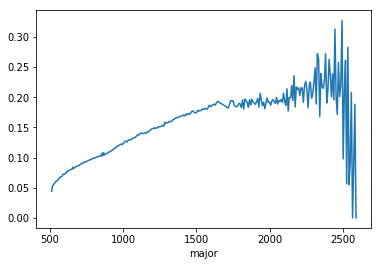

In [8]:
print('Before Simplification: ', len(ref1s.data.index))
ref1s.data.iloc[:, 0].plot()

After Simplification:  215


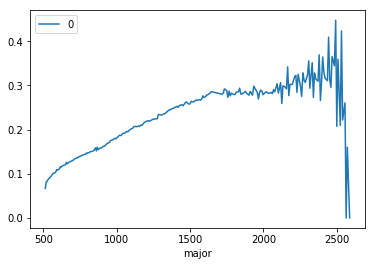

In [9]:
print('After Simplification: ', len(newline.index))
newline.plot()

# Average Simplification of Observations For Arbitrary Image

In [10]:
original_plots = []
reduced_plots = []

In [11]:
# original_plots = []
# reduced_plots = []
# for i in range(0,83):
# #     indices_to_keep = DouglasPeucker(ref1s.data.iloc[:, i], ref1s.data.index )
# #     newline = convert(indices_to_keep)
#     original_plots.append(ref1s.data.iloc[:, i])
#     newline = standard_size( 220, original_plots[i])[0]
#     reduced_plots.append(newline)

In [12]:
# i = 5
# print(reduced_plots[i])

In [13]:
# average_reduction = 0
# for df in reduced_plots:
#     print(len(df)) 
#     average_reduction += len(df)
# print('From 269 to', average_reduction/len(reduced_plots))

In [14]:
# # compare specific observations
# i = 37
# original_plots[i].plot()
# reduced_plots[i].plot()
# print((reduced_plots[i]))
# print((reduced_plots[i].sort_index()))

# Hash Comparisons

In [37]:
# create a hash
def compute_minhash(col, size = 256, **kwargs):
    if type(col) is not np.ndarray:
        col = np.array(col.values.flatten().tolist())
    mg = WeightedMinHashGenerator(len(col), size)
    v = col
    m = mg.minhash(v)
    return m

# Checking raw data 
def jaccard_similarity( array1, array2 ):
    union = len( np.union1d(array1, array2) )
    intersect = len( np.intersect1d(array1, array2) )
    jaccard_index = intersect/union
    jaccard_distance = 1 - jaccard_index  # just in case
    return jaccard_index

def jaccard_similarity_hash( hash1, hash2 ):
    intersection = 0
    for this, that in zip(hash1.hashvalues, hash2.hashvalues):
        print(this)
        if np.array_equal(this, that):
            intersection += 1
    return float(intersection) / float(len(hash1))


In [16]:
from pathlib import Path
import time
import csv

counter = 0

for key, value in d.items():
    counter += 1
    print('\n\nFile Number {} : File Name {}\n\n'.format( counter, key) )
    size = 269
    sizes = []
    epsilon = 0
    resulting_arr = []
    originals_plots = []
    reducedr_plots = []
    persistent_plots = []
    while size >= 199:
        filename = 'data/{}_reduced_by_{}.npy'.format( key , 269 - size)
        print( filename )
        start = time.time()
        print( 'Entering size ({}) with epsilon ({})'.format(size, epsilon), end = ' : ')
        if Path( filename ).is_file():
            print('npy file exists in data directory')
            size -= 5
            continue
        sizes.append(269 - size)
        reducedr_plots = []
        for i in range(0, len( value.columns ) ):
            originals_plots.append( value.iloc[:, i])
            newline, epsilon = standard_size( size, value.iloc[:, i], epsilon)
            reducedr_plots.append( np.array(newline.values.flatten().tolist()) )
        persistent_plots.append( np.array(reducedr_plots) )
        np.save(filename, np.array(reducedr_plots) )   
        size -= 5
        print(time.time() - start)

#     i = 0
#     for x in persistent_plots:
#         f = 'data/reduced_by_{}.npy'.format(sizes[i])
         
#         i += 1



File Number 1 : File Name SP_2C_02_00940_S038_E2652.spc


data/SP_2C_02_00940_S038_E2652.spc_reduced_by_0.npy
Entering size (269) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_00940_S038_E2652.spc_reduced_by_5.npy
Entering size (264) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_00940_S038_E2652.spc_reduced_by_10.npy
Entering size (259) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_00940_S038_E2652.spc_reduced_by_15.npy
Entering size (254) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_00940_S038_E2652.spc_reduced_by_20.npy
Entering size (249) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_00940_S038_E2652.spc_reduced_by_25.npy
Entering size (244) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_00940_S038_E2652.spc_reduced_by_30.npy
Entering size (239) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_00940_S038_E2652.spc_reduced_by_35.npy
Enterin

Entering size (254) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_05890_S040_E1581.spc_reduced_by_20.npy
Entering size (249) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_05890_S040_E1581.spc_reduced_by_25.npy
Entering size (244) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_05890_S040_E1581.spc_reduced_by_30.npy
Entering size (239) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_05890_S040_E1581.spc_reduced_by_35.npy
Entering size (234) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_05890_S040_E1581.spc_reduced_by_40.npy
Entering size (229) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_05890_S040_E1581.spc_reduced_by_45.npy
Entering size (224) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_05890_S040_E1581.spc_reduced_by_50.npy
Entering size (219) with epsilon (0) : npy file exists in data directory
data/SP_2C_02_05890_S040_E1581.spc_reduced_by

In [17]:
old_list = []

for f in glob.glob('/home/cole/work/data/smoothed_lines/*.npy'):
    old_list.append(np.load(f))

print( len(old_list) )

230


In [18]:
new_list = []

for f in glob.glob('data/*.npy'):
    new_list.append(np.load(f))

In [19]:
# no order on glob so reorder to make things easier to track
temp_list = new_list
c = {}
for entry in temp_list:
    key = str(269 - len(entry[0]))
    try:
        c[ key ].append(entry) 
    except KeyError:
        c[ key ] = [entry]

In [20]:
new_list = []

for i in range(0, 75, 5):
    temp = c[str(i)]
    new_list.append( [] )
    for j in temp:
        for entry in j:
            new_list[-1].append( entry )

for i in new_list:
    print(len(i[0]))

269
264
259
254
249
244
239
234
229
224
219
214
209
204
199


Original std: 0.5944742169466255 
Average  std: 0.593423629357161


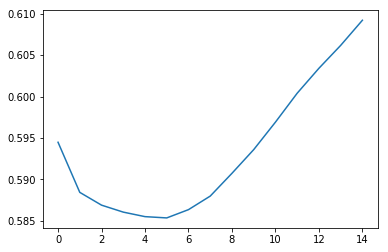

In [120]:
stddev = []
for x in new_list:
    stddev.append( np.nanstd(x) )
stddev = np.array( stddev )
plt.plot(stddev)
print("Original std: {} \nAverage  std: {}".format( stddev[0] , np.mean(stddev) ) )

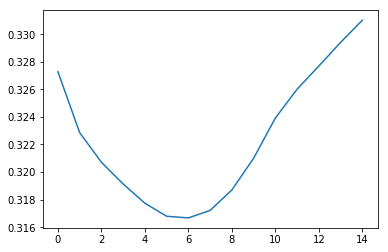

In [121]:
mean = []
for x in new_list:
    mean.append( np.mean(x) )
mean = np.array( mean )
plt.plot(mean)

In [122]:
og_hashes = []
matches = []

print("Creating Hashes From Non-Smoothed Data")
start = time.time()
for observation in new_list[0]:
    og_hashes.append( compute_minhash( observation , 256) )

lsh = MinHashLSH(threshold=0.98, num_perm=256)
for i, j in enumerate(og_hashes):
    lsh.insert("{}".format(i), j )
print('Took {} minutes to find hash values for {} entries'.format( ((time.time() - start)/60) , len(new_list[0]) ) )

Creating Hashes From Non-Smoothed Data
Took 1.848657739162445 minutes to find hash values for 2495 entries


In [123]:
matches = []

print("Now Find All Querys that Return More Than Just Itself")
for hash_t in og_hashes:
    temp = lsh.query( hash_t )
    if len(temp) > 1:
        element = og_hashes.index(hash_t)
        temp = list(map(int, temp))
        temp.insert( 0, temp.pop( temp.index(element) ) )
        matches.append(temp)
print(len(matches) )

Now Find All Querys that Return More Than Just Itself
563


In [124]:
og_list = new_list[0]
lsh_list = []
master_hash = []
sizes = []
for i in range( 256, 80, -8 ):
    sizes.append(i)
    
for size in sizes:
    hashes = []
    for i in og_list:
        hashes.append( compute_minhash( i, size ) )
    
    lsh = MinHashLSH(threshold = 0.98, num_perm = size)
    for i, j in enumerate(hashes):
        lsh.insert("{}".format(i), j )
    lsh_list.append(lsh)
    master_hash.append( hashes )

[0.0, 0.45361743545580135, 0.4576131782170859, 0.4587268024003997, 0.46161680238056785, 0.4490541667595157, 0.46400551743384255, 0.4704527365273369, 0.4488778379933954, 0.4601110701021891, 0.46616947784798585, 0.4561378625321787, 0.4498758247870148, 0.46425284800062777, 0.47886069426921996, 0.472562428690315, 0.5085393193741329, 0.4594598122059092, 0.46033724022178735, 0.46398026189322816, 0.46680234606522353, 0.4793233548821289]


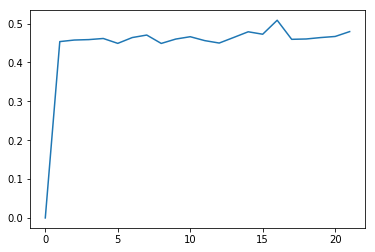

In [125]:
# np.equal is failing so
def equality( list1, list2 ):
    returnval = True
    if np.setdiff1d( list2, list1 ).size != 0:
        returnval = False
    if np.setdiff1d( list1, list2 ).size != 0:
        returnval = False
    return returnval

def percent_diff( list1, list2 ):
    set1 = np.setdiff1d( list2, list1 )
    set2 = np.setdiff1d( list1, list2 )
    set_union = np.union1d( set1, set2)
    return len( set_union )/len( np.union1d(list1, list2) )

def absolute_diff( list1, list2 ):
    set1 = np.setdiff1d( list2, list1 )
    set2 = np.setdiff1d( list1, list2 )
    set_union = np.union1d( set1, set2)
    return len( set_union )

big_list = [[] for i in range( len(sizes) )]
average_size = [[] for i in range( len(sizes) )]

for query in matches:
    query = query[0]
    list_t = lsh_list[0].query(master_hash[0][query])

    for i in range(0, len(lsh_list)):
        list_q = lsh_list[i].query(master_hash[i][query])
        val = percent_diff(list_t, list_q)
        big_list[i].append( val )
        average_size[i].append( absolute_diff( list_t, list_q ) )

means = []
for i in big_list:
    means.append(np.mean(i))
print(means)
plt.plot(means)

# locs, labels = plt.xticks()
# size_label = []
# for i in sizes:
#     size_label.append(str(i))
# plt.xticks(locs, size_label)


[0.0, 1.941385435168739, 1.8436944937833037, 1.941385435168739, 1.936056838365897, 2.1509769094138544, 2.1509769094138544, 2.2397868561278864, 1.9591474245115452, 1.9928952042628774, 2.168738898756661, 2.019538188277087, 2.0550621669626996, 2.1509769094138544, 2.339253996447602, 2.206039076376554, 2.730017761989343, 2.060390763765542, 1.975133214920071, 1.8738898756660747, 2.0142095914742453, 2.3623445825932503]


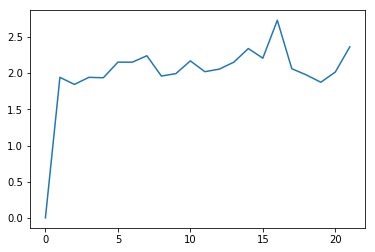

In [126]:
means = []
for i in average_size:
    means.append(np.mean(i))
print(means)
plt.plot(means)

# locs, labels = plt.xticks()
# size_label = ['0']
# for i in sizes:
#     size_label.append(str(i))
# plt.xticks(locs, size_label)


In [68]:
stop

NameError: name 'stop' is not defined

In [128]:
import sys
counter = 0
for lsh in lsh_list:
    print(lsh.hashranges)
    for ht in lsh.hashtables:
        k = list(ht.keys())[0]
        print(len(ht.keys()), sys.getsizeof(k))
    print( 'Hash Size For {}: {}'.format(sizes[counter] , len(lsh.hashranges) * (sys.getsizeof(k))))
    counter += 1

[(0, 85), (85, 170), (170, 255)]
2303 1393
2296 1393
2300 1393
Hash Size For 256: 4179
[(0, 100), (100, 200)]
2366 1633
2312 1633
Hash Size For 248: 3266
[(0, 100), (100, 200)]
2369 1633
2370 1633
Hash Size For 240: 3266
[(0, 100), (100, 200)]
2377 1633
2343 1633
Hash Size For 232: 3266
[(0, 100), (100, 200)]
2361 1633
2371 1633
Hash Size For 224: 3266
[(0, 100), (100, 200)]
2353 1633
2327 1633
Hash Size For 216: 3266
[(0, 100), (100, 200)]
2337 1633
2339 1633
Hash Size For 208: 3266
[(0, 100), (100, 200)]
2331 1633
2275 1633
Hash Size For 200: 3266
[(0, 96), (96, 192)]
2352 1569
2311 1569
Hash Size For 192: 3138
[(0, 92), (92, 184)]
2361 1505
2308 1505
Hash Size For 184: 3010
[(0, 88), (88, 176)]
2297 1441
2330 1441
Hash Size For 176: 2882
[(0, 84), (84, 168)]
2369 1377
2306 1377
Hash Size For 168: 2754
[(0, 80), (80, 160)]
2349 1313
2275 1313
Hash Size For 160: 2626
[(0, 76), (76, 152)]
2324 1249
2309 1249
Hash Size For 152: 2498
[(0, 72), (72, 144)]
2251 1185
2330 1185
Hash Size For

In [42]:
thresh = 0
lsh_list = []
master_hash = []
for reduced in new_list:
    print(len(reduced))
    hashes = []
    for i in reduced:
        hashes.append( compute_minhash( i, 128 ) )
    
    lsh = MinHashLSH(threshold=lsh_values[thresh])
    for i, j in enumerate(hashes):
        lsh.insert("{}".format(i), j )
    lsh_list.append(lsh)
    master_hash.append(hashes)
    thresh += 1

2495
2495
2495
2495
2495
2495


KeyboardInterrupt: 

In [25]:
# test one. Average control and use that as threshhold. 98 seems like a good base value. To see if the noise of the jaccard values is consistent pick non-smoothed values
# that have a similarity of .98 and find its values at each level of reduction then create an lsh with those values
# for each level of smoothness and see how closely the behavior is to the non reduced counterpart

# comp = 1.0

# lsh_values = []
# jaccards = []

# print( len( matches ) )
# print( len( new_list) )
# for reduced in new_list:
#     average = 0
#     for results in matches:
#         for i in range( 1, len(results) ):
#             jaccards.append( compute_minhash(reduced[results[0]]).jaccard( compute_minhash( reduced[results[i]]) ) )

#     lsh_values.append(np.mean( jaccards ) )
    
# print( "{} : {}".format( comp, lsh_values[0] ) )
# np.save( 'lsh_values.npy', lsh_values )

In [26]:
lsh_values = []

for reduced in new_list:
    jaccards = []
    for results in matches:
        for i in range( 1, len(results) ):
            jaccards.append( compute_minhash(reduced[results[0]]).jaccard( compute_minhash( reduced[results[i]]) ) )
    print('{}'.format( np.mean( jaccards ) ) )
    lsh_values.append(np.mean( jaccards ) * .98 )
    
print( "{} : {}".format( .98, lsh_values[0] ) )
print( lsh_values )
np.save( 'lsh_values.npy', lsh_values )

1.0
0.373875
0.38453125
0.41259375
0.361
0.3275
0.24421875
0.34703125
0.262375
0.38003125
0.29978125
0.38596875
0.31246875
0.32709375
0.407
0.98 : 0.98
[0.98, 0.3663975, 0.376840625, 0.40434187499999996, 0.35378, 0.32095, 0.23933437500000002, 0.340090625, 0.2571275, 0.37243062499999996, 0.293785625, 0.378249375, 0.306219375, 0.320551875, 0.39886]


In [27]:
thresh = 0
lsh_list = []
master_hash = []
for reduced in new_list:
    hashes = []
    for i in reduced:
        hashes.append( compute_minhash( i ) )
    
    lsh = MinHashLSH(threshold=lsh_values[thresh])
    for i, j in enumerate(hashes):
        lsh.insert("{}".format(i), j )
    lsh_list.append(lsh)
    master_hash.append(hashes)
    thresh += 1

In [28]:
len(lsh_list)

15

In [30]:
# np.equal is failing so
def equality( list1, list2 ):
    returnval = True
    if np.setdiff1d( list2, list1 ).size != 0:
        returnval = False
    if np.setdiff1d( list1, list2 ).size != 0:
        returnval = False
    return returnval

def percent_diff( list1, list2 ):
    set1 = np.setdiff1d( list2, list1 )
    set2 = np.setdiff1d( list1, list2 )
    set_union = np.union1d( set1, set2)
    return len( set_union )/len( np.union1d(list1, list2) )

plots = []
for query in matches:
    incomplete = []
    all_results = []
    query = query[0]
    list_t = lsh_list[0].query(master_hash[0][query])
    same = 0
    complete = 0
    neither = 0
    s = {}
    
    for i in range(0, len(lsh_list)):
        list_q = lsh_list[i].query(master_hash[i][query])
        s[str(i)] = percent_diff(list_t, list_q)
        
        all_results.append(s)
        if equality( list_t, list_q ):
            same += 1
        elif equality( list_t, np.intersect1d(list_t, list_q) ):
            complete += 1
        else:
            incomplete.append( list_q )

    print( "\nFor query: {}".format(query) )
    print( "Amount of Perfect Returns: {}".format( same ))
    print( "Amount of Imperfect Complete Returns: {}".format( complete ) )
    print( "Amount of Incomplete Returns: {}".format( len(lsh_list) - same - complete))
    print( "Total Returns: {}\n".format( len(lsh_list) ) )
    for key, value in s.items():
        if value >= .25:
            print(key, value)


For query: 0
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 3
Amount of Incomplete Returns: 11
Total Returns: 15

1 0.9992987377279102
2 0.9993373094764745
3 0.991304347826087
4 0.9992987377279102
5 0.9988895058300944
6 0.9982653946227233
7 0.9975308641975309
8 0.9979550102249489
9 0.999344262295082
10 0.9939393939393939
11 0.9993103448275862
12 0.9993252361673415
13 0.9993136582017845
14 0.9992553983618764

For query: 1
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 3
Amount of Incomplete Returns: 11
Total Returns: 15

1 0.9992354740061162
2 0.9993247805536799
3 0.99581589958159
4 0.9992932862190813
5 0.998719590268886
6 0.9984025559105432
7 0.995575221238938
8 0.9983974358974359
9 0.99933818663137
10 0.9981024667931688
11 0.9987569919204475
12 0.9993351063829787
13 0.999340804218853
14 0.9992892679459844

For query: 2
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 4
Amount of Incomplete Returns: 10
Total Returns: 15

1 0.99


For query: 240
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 2
Amount of Incomplete Returns: 12
Total Returns: 15

1 0.9982300884955753
2 0.9993464052287582
3 0.9993544222078761
4 0.9986859395532195
5 0.9973262032085561
6 0.9987163029525032
7 0.9743589743589743
8 0.998272884283247
9 0.9942196531791907
10 0.9972972972972973
11 0.9992301770592764
12 0.975
13 0.9977477477477478
14 0.875

For query: 241
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 2
Amount of Incomplete Returns: 12
Total Returns: 15

1 0.9991909385113269
2 0.9993394980184941
3 0.9992727272727273
4 0.999117387466902
5 0.9973890339425587
6 0.9987163029525032
7 0.9615384615384616
8 0.9983739837398374
9 0.998674618952949
10 0.9969230769230769
11 0.9993108201240524
12 0.9411764705882353
13 0.9992498124531133
14 0.8333333333333334

For query: 242
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 0
Amount of Incomplete Returns: 14
Total Returns: 15

1 0.9969135802469136


For query: 491
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 9
Amount of Incomplete Returns: 5
Total Returns: 15

1 0.9983700081499592
2 0.9984836997725549
3 0.9986666666666667
4 0.9962264150943396
5 0.9988221436984688
6 0.9985683607730852
7 0.99909338168631
8 0.9988719684151156
9 0.9986431478968792
10 0.9975728155339806
11 0.9974842767295597
12 0.9985369422092173
13 0.9961389961389961
14 0.9965034965034965

For query: 492
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 9
Amount of Incomplete Returns: 5
Total Returns: 15

1 0.9983753046303818
2 0.9986868023637557
3 0.9986684420772304
4 0.9787234042553191
5 0.9979959919839679
6 0.9987714987714987
7 0.9990723562152134
8 0.9980916030534351
9 0.9986130374479889
10 0.9971830985915493
11 0.9974715549936789
12 0.9985294117647059
13 0.9984126984126984
14 0.9965034965034965

For query: 493
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 6
Amount of Incomplete Returns: 8
Total Returns: 


For query: 815
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 6
Amount of Incomplete Returns: 8
Total Returns: 15

1 0.9964850615114236
2 0.9992424242424243
3 0.9986754966887417
4 0.9986648865153538
5 0.9947089947089947
6 0.9964285714285714
7 0.9993169398907104
8 0.9985207100591716
9 0.9857142857142858
10 0.9987722529158993
11 0.9991554054054054
12 0.9981884057971014
13 0.991869918699187
14 0.99836867862969

For query: 820
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 1
Amount of Incomplete Returns: 13
Total Returns: 15

1 0.9927007299270073
2 0.9979879275653923
3 0.9973333333333333
4 0.997103548153512
5 0.989501312335958
6 0.9927404718693285
7 0.9981360671015843
8 0.9957081545064378
9 0.8571428571428571
10 0.9969001859888407
11 0.9978991596638656
12 0.997093023255814
13 0.9629629629629629
14 0.9966555183946488

For query: 821
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 1
Amount of Incomplete Returns: 13
Total Returns: 15


For query: 900
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 3
Amount of Incomplete Returns: 11
Total Returns: 15

1 0.9959935897435898
2 0.9964838255977496
3 0.8333333333333334
4 0.989247311827957
5 0.9944903581267218
6 0.9962616822429906
7 0.9966216216216216
8 0.9875930521091811
9 0.9855072463768116
10 0.9963702359346642
11 0.8928571428571429
12 0.9965349965349966
13 0.9832214765100671
14 0.9787234042553191

For query: 900
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 3
Amount of Incomplete Returns: 11
Total Returns: 15

1 0.9959935897435898
2 0.9964838255977496
3 0.8333333333333334
4 0.989247311827957
5 0.9944903581267218
6 0.9962616822429906
7 0.9966216216216216
8 0.9875930521091811
9 0.9855072463768116
10 0.9963702359346642
11 0.8928571428571429
12 0.9965349965349966
13 0.9832214765100671
14 0.9787234042553191

For query: 889
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 4
Amount of Incomplete Returns: 10
Total Return


For query: 244
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 3
Amount of Incomplete Returns: 11
Total Returns: 15

1 0.9927797833935018
2 0.9979906229068989
3 0.997134670487106
4 0.9986101459346769
5 0.9946949602122016
6 0.9973404255319149
7 0.9375
8 0.9967159277504105
9 0.9932432432432432
10 0.9938650306748467
11 0.9975728155339806
12 0.9636363636363636
13 0.9986996098829649
14 0.9587628865979382

For query: 245
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 3
Amount of Incomplete Returns: 11
Total Returns: 15

1 0.9968051118210862
2 0.9984423676012462
3 0.9987212276214834
4 0.9993386243386243
5 0.9973753280839895
6 0.9993654822335025
7 0.9545454545454546
8 0.9988283538371412
9 0.994535519125683
10 0.9969135802469136
11 0.9987915407854985
12 0.9848484848484849
13 0.9993150684931507
14 0.6666666666666666

For query: 246
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 3
Amount of Incomplete Returns: 11
Total Returns: 15

1 0.9


For query: 1252
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 4
Amount of Incomplete Returns: 10
Total Returns: 15

1 0.9915254237288136
2 0.9978517722878625
3 0.9985390796201608
4 0.9958620689655172
5 0.9975520195838433
6 0.9975124378109452
7 0.9979729729729729
8 0.9981927710843373
9 0.997179125528914
10 0.9975490196078431
11 0.9974093264248705
12 0.9980302035456337
13 0.995
14 0.9970738844184345

For query: 1253
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 10
Amount of Incomplete Returns: 4
Total Returns: 15

1 0.9937888198757764
2 0.9977728285077951
3 0.9974683544303797
4 0.9972565157750343
5 0.998814463544754
6 0.9987684729064039
7 0.9993238674780257
8 0.9987616099071207
9 0.9985865724381625
10 0.9985096870342772
11 0.9982935153583617
12 0.9985704074338814
13 0.9940119760479041
14 0.9983416252072969

For query: 1254
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 7
Amount of Incomplete Returns: 7
Total Returns: 15

1 0.


For query: 1344
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 0
Amount of Incomplete Returns: 14
Total Returns: 15

1 0.9930891499654457
2 0.9952477936184657
3 0.9958932238193019
4 0.9920823436262867
5 0.996039603960396
6 0.9932432432432432
7 0.992918961447679
8 0.9985865724381625
9 0.9950877192982456
10 0.9944659656889873
11 0.9836065573770492
12 0.9899888765294772
13 0.9935022742040286
14 0.9933872152828802

For query: 1344
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 0
Amount of Incomplete Returns: 14
Total Returns: 15

1 0.9930891499654457
2 0.9952477936184657
3 0.9958932238193019
4 0.9920823436262867
5 0.996039603960396
6 0.9932432432432432
7 0.992918961447679
8 0.9985865724381625
9 0.9950877192982456
10 0.9944659656889873
11 0.9836065573770492
12 0.9899888765294772
13 0.9935022742040286
14 0.9933872152828802

For query: 1345
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 5
Amount of Incomplete Returns: 9
Total Return

12 0.9987029831387808
13 0.998589562764457
14 0.9985326485693323

For query: 1250
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 8
Amount of Incomplete Returns: 6
Total Returns: 15

1 0.9950738916256158
2 0.9986622073578595
3 0.997275204359673
4 0.9953703703703703
5 0.9988597491448119
6 0.9987684729064039
7 0.9987012987012988
8 0.9980430528375733
9 0.9985935302390999
10 0.9988465974625144
11 0.9901960784313726
12 0.9987046632124352
13 0.9985885673959068
14 0.997948717948718

For query: 1251
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 5
Amount of Incomplete Returns: 9
Total Returns: 15

1 0.9921259842519685
2 0.9989154013015185
3 0.9935064935064936
4 0.99609375
5 0.9982227488151659
6 0.998108448928121
7 0.9984423676012462
8 0.9992503748125937
9 0.9979166666666667
10 0.9987531172069826
11 0.9991836734693877
12 0.9978070175438597
13 0.9984496124031008
14 0.9978510028653295

For query: 1252
Amount of Perfect Returns: 1
Amount of Imperfect Complete


For query: 3
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 3
Amount of Incomplete Returns: 11
Total Returns: 15

1 0.999219968798752
2 0.9993315508021391
3 0.995575221238938
4 0.9992922859164898
5 0.9986945169712794
6 0.9977578475336323
7 0.9965397923875432
8 0.9987827145465612
9 0.9993368700265252
10 0.9980769230769231
11 0.9991728701406121
12 0.9993201903467029
13 0.998703823720026
14 0.9991518235793045

For query: 4
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 4
Amount of Incomplete Returns: 10
Total Returns: 15

1 0.9966555183946488
2 0.9938650306748467
3 0.9974937343358395
4 0.9993002099370188
5 0.9986338797814208
6 0.9978401727861771
7 0.9954337899543378
8 0.9989462592202318
9 0.9993434011818779
10 0.9982078853046595
11 0.99875
12 0.9993342210386151
13 0.9985964912280701
14 0.9991889699918897

For query: 5
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 3
Amount of Incomplete Returns: 11
Total Returns: 15

1 0.9960937


For query: 1661
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 7
Amount of Incomplete Returns: 7
Total Returns: 15

1 0.9986357435197817
2 0.9993315508021391
3 0.9986754966887417
4 0.9955357142857143
5 0.999388379204893
6 0.9978401727861771
7 0.9980676328502416
8 0.9994033412887828
9 0.9992957746478873
10 0.9988016776512882
11 0.990909090909091
12 0.9953379953379954
13 0.9961240310077519
14 0.9985074626865672

For query: 804
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 1
Amount of Incomplete Returns: 13
Total Returns: 15

1 0.9950424929178471
2 0.9952380952380953
3 0.9933065595716198
4 0.9948529411764706
5 0.9963560645497137
6 0.9923547400611621
7 0.9982285208148804
8 0.9938271604938271
9 0.9230769230769231
10 0.9975445058317987
11 0.9880952380952381
12 0.995049504950495
13 0.9821428571428571
14 0.9960722702278083

For query: 804
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 1
Amount of Incomplete Returns: 13
Total Returns


For query: 826
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 5
Amount of Incomplete Returns: 9
Total Returns: 15

1 0.9981114258734656
2 0.999266862170088
3 0.9986675549633578
4 0.9991596638655462
5 0.996996996996997
6 0.9981785063752276
7 0.9927007299270073
8 0.9956896551724138
9 0.96875
10 0.9987616099071207
11 0.9959016393442623
12 0.9992753623188406
13 0.975609756097561
14 0.998422712933754

For query: 827
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 5
Amount of Incomplete Returns: 9
Total Returns: 15

1 0.9986291980808774
2 0.9992743105950653
3 0.9987105093488072
4 0.9992684711046086
5 0.9939759036144579
6 0.9982935153583617
7 0.990990990990991
8 0.9972677595628415
9 0.9761904761904762
10 0.9987623762376238
11 0.9888888888888889
12 0.9992647058823529
13 0.9876543209876543
14 0.998422712933754

For query: 828
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 4
Amount of Incomplete Returns: 10
Total Returns: 15

1 0.998436


For query: 82
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 8
Amount of Incomplete Returns: 6
Total Returns: 15

1 0.9993145990404386
2 0.9986440677966102
3 0.9957081545064378
4 0.9985390796201608
5 0.9988331388564761
6 0.9983739837398374
7 0.9987129987129987
8 0.9994413407821229
9 0.998661311914324
10 0.994475138121547
11 0.9987684729064039
12 0.9986675549633578
13 0.9986366734832992
14 0.9984951091045899

For query: 2426
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 6
Amount of Incomplete Returns: 8
Total Returns: 15

1 0.9888888888888889
2 0.9964589235127479
3 0.996206373292868
4 0.9963662790697675
5 0.9967928159076331
6 0.978494623655914
7 0.9849624060150376
8 0.9766081871345029
9 0.9971469329529244
10 0.9259259259259259
11 0.9959742351046699
12 0.997789240972734
13 0.9967824967824968
14 0.9975369458128078

For query: 2426
Amount of Perfect Returns: 1
Amount of Imperfect Complete Returns: 6
Amount of Incomplete Returns: 8
Total Returns: 15

In [ ]:
stop

In [ ]:
# find standard deviation of all plots to see if there is any correlation to the noise
std_plots = []
for i in range( len( plots[0]) ):
    temp = []
    for plot in plots:
        temp.append( plot[i] )
    std_plots.append( np.std(temp) )

plt.plot(std_plots) 
# 32 and 29 did poorly but all the others did pretty well what is wrong with those two
# those are the perfect ones why would they have the biggest issue

In [ ]:
plt.plot(new_list[0][29])
plt.plot(new_list[0][32])

In [ ]:
plt.plot(new_list[89][29])
plt.plot(new_list[89][32])

In [ ]:
plt.plot(new_list[135][29])
plt.plot(new_list[135][32])

In [ ]:
graph_jaccard = []
for i in range( len(master_hash) ):
    graph_jaccard.append(master_hash[i][29].jaccard(master_hash[i][32]))
plt.plot(graph_jaccard)

In [ ]:
graph_mean = []
for i in range(0, len(master_hash)):
    graph_mean.append(np.mean(graph_jaccard[0:i]))
plt.plot(graph_mean)

In [ ]:
stop

In [ ]:
reduced_hashes = []
for i in reduced_plots:
    reduced_hashes.append( compute_minhash( i ) )

In [ ]:
hash_query_index = 13
# Create weighted MinHash LSH index
r_lsh = MinHashLSH(threshold=0.95, num_perm=128, prepickle=False)
for i, j in enumerate(reduced_hashes):
    r_lsh.insert("{}".format(i), j)
result = r_lsh.query(reduced_hashes[hash_query_index])
print("Approximate neighbours with weighted Jaccard similarity > 0.98", result)


In [ ]:
# newthing = []
# for hash_query_index in range(0, 83):
#     r = r_lsh.query(reduced_hashes[hash_query_index])
#     o = o_lsh.query(original_hashes[hash_query_index])
#     if len(o) > 0:
#         newthing.append( (hash_query_index, r, o) )
# print(newthing)

In [ ]:
original_hashes = []
for i in original_plots:
    original_hashes.append( compute_minhash( i ) )

In [ ]:
# Create weighted MinHash LSH index
o_lsh = MinHashLSH(threshold=0.95, num_perm=128, prepickle=False)
for i, j in enumerate(original_hashes):
    o_lsh.insert("{}".format(i), j)
result = o_lsh.query(original_hashes[hash_query_index])
print("Approximate neighbours with weighted Jaccard similarity > 0.98", result)

In [ ]:
jih = jaccard_similarity_hash(reduced_hashes[13], reduced_hashes[52])
jd = reduced_hashes[13].jaccard(reduced_hashes[52])
ojih = jaccard_similarity_hash(original_hashes[13], original_hashes[52])
ojd = original_hashes[13].jaccard(original_hashes[52])
print( jih, jd)
print( ojih, ojd)

In [ ]:
print(reduced_hashes[13].jaccard(reduced_hashes[0]))
print(original_hashes[13].jaccard(original_hashes[0]))
print(reduced_hashes[13].jaccard(reduced_hashes[52]))
print(original_hashes[13].jaccard(original_hashes[52]))



In [ ]:
original_plots[13].plot()
original_plots[52].plot()

In [ ]:
plt.plot(reduced_plots[13])
plt.plot(reduced_plots[52])


In [ ]:
plt.plot(original_plots[13])
plt.plot(reduced_plots[13])

In [ ]:
plt.plot(original_plots[52])
plt.plot(reduced_plots[52])


In [ ]:
plt.plot(original_plots[0])
plt.plot(reduced_plots[0])

In [ ]:
plt.plot(reduced_plots[13])
plt.plot(reduced_plots[0])

In [ ]:
plt.plot(original_plots[13])
plt.plot(original_plots[0])